# Advanced Artificial Intelligence
## PC1

# Instructions

* Complete the assignment using any programming language.
* You need to send the source code of your solution along
  with a markdown containing graphs of the progress of the
  solutions after running for exactly 3 minutes.
* All your files should go in a github (or similar)
  repository.
* You must send the link to the repository online and a zip
  containing all the files as well.


In [ ]:
# Libraries needed

import random
import itertools
import numpy as np
from collections import defaultdict 

import time
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn configuration
%matplotlib inline
sns.set(rc={'figure.figsize':(16.0,4.0)})

In [ ]:
%%file sample.txt
4 5
0 10 1 20 2 20 3 40 4 10
1 20 0 10 3 30 2 50 4 30
2 30 1 20 4 12 3 40 0 10
4 50 3 30 2 15 0 20 1 15

Writing sample.txt


In [ ]:
# from https://github.com/tamy0612/JSPLIB/blob/master/instances/abz7

#+++++++++++++++++++++++++++++
# instance abz7
#+++++++++++++++++++++++++++++
# Adams, Balas, and Zawack 15 x 20 instance (Table 1, instance 7)

%%file sample.txt
20 15
 2 24  3 12  9 17  4 27  0 21  6 25  8 27  7 26  1 30  5 31 11 18 14 16 13 39 10 19 12 26
 6 30  3 15 12 20 11 19  1 24 13 15 10 28  2 36  5 26  7 15  0 11  8 23 14 20  9 26  4 28
 6 35  0 22 13 23  7 32  2 20  3 12 12 19 10 23  9 17  1 14  5 16 11 29  8 16  4 22 14 22
 9 20  6 29  1 19  7 14 12 33  4 30  0 32  5 21 11 29 10 24 14 25  2 29  3 13  8 20 13 18
11 23 13 20  1 28  6 32  7 16  5 18  8 24  9 23  3 24 10 34  2 24  0 24 14 28 12 15  4 18
 8 24 11 19 14 21  1 33  7 34  6 35  5 40 10 36  3 23  2 26  4 15  9 28 13 38 12 13  0 25
13 27  3 30  6 21  8 19 12 12  4 27  2 39  9 13 14 12  5 36 10 21 11 17  1 29  0 17  7 33
 5 27  4 19  6 29  9 20  3 21 10 40  8 14 14 39 13 39  2 27  1 36 12 12 11 37  7 22  0 13
13 32 11 29  8 24  3 27  5 40  4 21  9 26  0 27 14 27  6 16  2 21 10 13  7 28 12 28  1 32
12 35  1 11  5 39 14 18  7 23  0 34  3 24 13 11  8 30 11 31  4 15 10 15  2 28  9 26  6 33
10 28  5 37 12 29  1 31  7 25  8 13 14 14  4 20  3 27  9 25 13 31 11 14  6 25  2 39  0 36
 0 22 11 25  5 28 13 35  4 31  8 21  9 20 14 19  2 29  7 32 10 18  1 18  3 11 12 17  6 15
12 39  5 32  2 36  8 14  3 28 13 37  0 38  6 20  7 19 11 12 14 22  1 36  4 15  9 32 10 16
 8 28  1 29 14 40 12 23  4 34  5 33  6 27 10 17  0 20  7 28 11 21  2 21 13 20  9 33  3 27
 9 21 14 34  3 30 12 38  0 11 11 16  2 14  5 14  1 34  8 33  4 23 13 40 10 12  6 23  7 27
 9 13 14 40  7 36  4 17  0 13  5 33  8 25 13 24 10 23  3 36  2 29  1 18 11 13  6 33 12 13
 3 25  5 15  2 28 12 40  7 39  1 31  8 35  6 31 11 36  4 12 10 33 14 19  9 16 13 27  0 21
12 22 10 14  0 12  2 20  5 12  1 18 11 17  8 39 14 31  3 31  7 32  9 20 13 29  4 13  6 26
 5 18 10 30  7 38 14 22 13 15 11 20  9 16  3 17  1 12  2 13 12 40  6 17  8 30  4 38  0 13
 9 31  8 39 12 27  1 14  5 33  3 31 11 22 13 36  0 16  7 11 14 14  4 29  6 28  2 22 10 17

Overwriting sample.txt


## Part 1

For the problem discussed in class, JSSP, organize the python code (in a different language if you prefer) to test the random sampling solutions discussed in class.


* (3 points) make the code reusable streamlined to test different instances of the problem.

### Solution implementation:

###### Read the file and parsed its content

In [ ]:
class Reader:
    def __init__(self, filename:str):
        self.__safe_read_file__(filename)
        self.__parse_text__()

    def __safe_read_file__(self, filename:str):
        fh = open(filename)
        self.txt = fh.read().splitlines()
        fh.close()

    # get a list of tuples as (job, machine, times)
    def __parse_text__(self):
        self.n, self.m = [ int(e) for e in self.txt[0].split()]
        matrix = [ [ int(e) for e in j.split()] for j in self.txt[1:]]
        # a task is just a tuple as (machine, times)
        tasks = [ tuple(zip(row[0::2], row[1::2])) for row in matrix ]
        temp_ls = [ [ (job, mch, times) for mch, times in task] \
              for job, task in enumerate(tasks) ]
        self.parsed = list( itertools.chain(*temp_ls)  )

    def get(self):
        return self.n, self.m, self.parsed[::]

In [ ]:
_reader = Reader('sample.txt')

# print the first ten items of the parsed text
_reader.parsed[:10]

[(0, 2, 24),
 (0, 3, 12),
 (0, 9, 17),
 (0, 4, 27),
 (0, 0, 21),
 (0, 6, 25),
 (0, 8, 27),
 (0, 7, 26),
 (0, 1, 30),
 (0, 5, 31)]

###### Reusable classes for random sampling and general representation respectively

In [ ]:
class RandomSolution:
    def __init__(self, reader: Reader):
        self.n, self.m, self.__solution__ = reader.get()
        random.shuffle( self.__solution__ )

# all representation is initialized as random by default
class Representation(RandomSolution):
    def __init__(self, reader: Reader, random=True, solution=[]):
        super().__init__(reader) if random \
            else self.__init_from_solution__(reader, solution)
        self.__build_gantt__()

    # but can load a solution from a parameter
    def __init_from_solution__(self, reader: Reader, solution: list):
        self.n, self.m, _ = reader.get()
        self.__solution__ = solution

    def __fix_lengths_str__(self, ls:list):
        for i in range(len(ls)):
            ls[i] += '_' * ( self.makespan - len(ls[i]) ) 
        return ls

    def __build_gantt__(self):
        gantt = ['' for i in range(self.m)]

        job_current_time = [0] * self.n
        for job, mch, times in self.__solution__:
            gantt[mch] += ("_" * max(0, job_current_time[job]- len(gantt[mch]) \
                                     )) + (str(job) * times)
            job_current_time[job] = len(gantt[mch])

        self.makespan = len(max(gantt, key=lambda x: len(x)))
        self.gantt = self.__fix_lengths_str__(gantt)

    def print(self):
        print('PROPOSED SOLUTION', self.__solution__, sep='\n')
        print('\nMAKESPAN:', self.makespan, sep='\t')

    def __gantt_str__(self):
        print('\nGANTT')
        for prog in self.gantt:
           print(prog)

    def __gantt_sns__(self):
        g_sns = [[int(e) if e != '_' else float('nan') for e in prog] for prog in self.gantt]
        hmap = sns.heatmap(g_sns, cmap="viridis", cbar_kws={'label': 'Jobs'})
        hmap.set(title=f"Gantt Diagram (Makespan: {self.makespan})", xlabel='Time', ylabel='Machine')
        hmap.set_facecolor("white")


Testing 1 instance of class just implemented

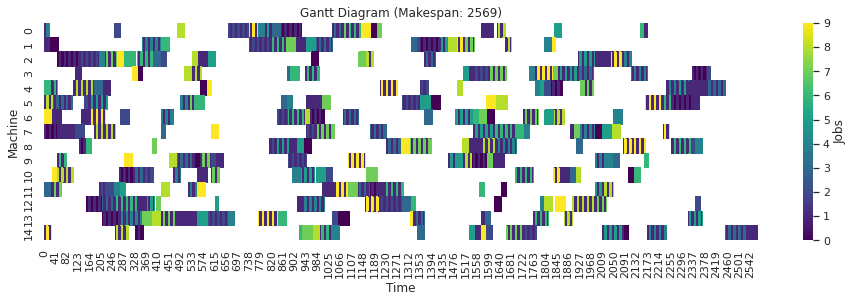

In [ ]:
_representation = Representation(_reader)

_representation.__gantt_sns__()

* (2 points) run the random sampling method on the same 
instances seen in CC206-Sesion6.pdf for exactly 3 minutes.

### Solution implementation:

In [ ]:
def save_best_representation(repr, _repr: Representation):
    if repr != None:
        if _repr.makespan < repr.makespan:
            return _repr
        return repr
    return _repr

def run3minutes_random_sampling(reader: Reader, saved_repr=None, xy_list=[]):
    _start, _end = time.time(),  time.time() + 60 * 3 # 3 minutes
    while time.time() < _end:
        _repr = Representation(reader)
        saved_repr = save_best_representation(saved_repr, _repr)
        xy_list.append((time.time() - _start, _repr.makespan))
    return xy_list, saved_repr

In [ ]:
xy_random_sample_makespans, _best_random_representation = run3minutes_random_sampling(_reader)

* (2 points) present graphs of the results in a similar fashion as seen in CC206-Sesion6.pdf.

### Solution implementation:

As the random sampling solution is low complexity but inconsistent, it will be quite difficult to see the graph as it is. \
For that reason, it's necessary to reduce the time unit. The function `xy_random_sample_makespans()` will keep with the \
best sample in the range of the minimum unit.

In [ ]:
# dds: number of decimal digits
def simplify_time_line(xy_list_tuples: list, dds=0) -> tuple:
    x, y = tuple(zip(*xy_list_tuples))
    d = defaultdict(list)
    for k, v in zip([ round(t, dds) for t in x ], y):
        d[k].append(v)
    d = { k: min(ls) for k, ls in d.items() }
    return tuple(zip(*[(x, y) for x, y in d.items()]))

def graph_as_cc206_session6(t:list, y:list):
    ax = sns.lineplot(x=t, y=y)
    ax.set(xlabel='Time in seconds', ylabel='Makespan')

Timeline obtenained by running 3 minutes of random sampling

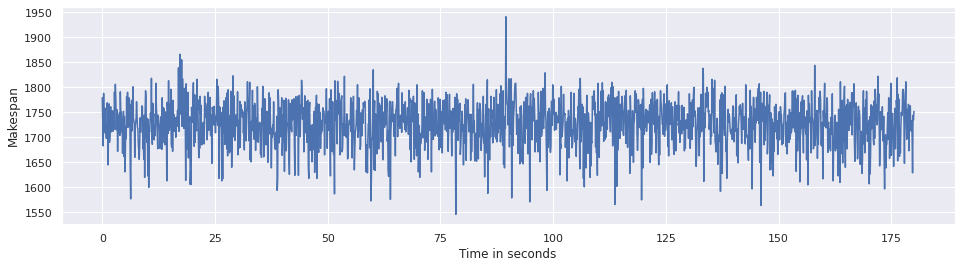

In [ ]:
graph_as_cc206_session6(*simplify_time_line(xy_random_sample_makespans, dds=1))

Best solution found by running 3 minutes of random sampling represented as a Gantt Diagram

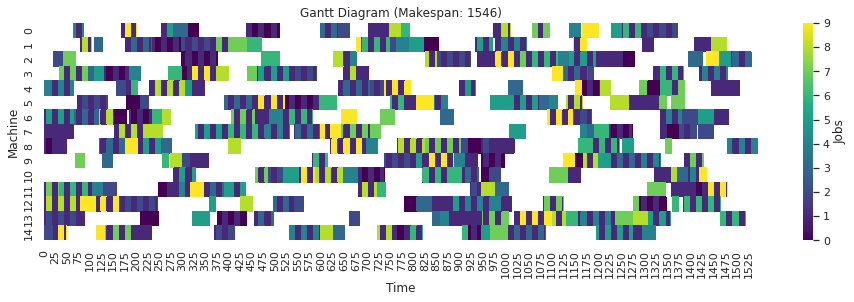

In [ ]:
_best_random_representation.__gantt_sns__()

## Part 2

Implement a solution using simulated annealing or genetic
algorithm.



* (5 points) implement the solution using 1 of the algorithms.

### Solution implementation:

In [ ]:
class Genetic:
    # z: initial population; mp: mutation probability
    def __init__(self, reader: Reader, z=8, mp=15):
        self.z, self.mp, self.reader = z, mp, reader
        self.samples = [ Representation(reader) for i in range(z) ]

    def __choose_peers__(self): # choose peers randomly
        temp_ls = random.sample(range(self.z // 2, self.z), self.z // 2)
        return [ temp_ls[i] for i in range(self.z // 2) ]

    def __selection_process__(self): # cuts-off low rating solutions
        peers = self.__choose_peers__()
        # to compare sustainability in JSSP we just need the lower makespan
        for k, v in enumerate(peers):
            if self.samples[k].makespan > self.samples[v].makespan:
                self.samples[k] = self.samples[v]

    def __crossing_process__(self):
        peers = self.__choose_peers__()
        for k, v in enumerate(peers):
            if k % 2 != 0:
                continue
            breakpoint = random.randint(1, self.z - 2)
            # cross
            child_solution_1 = self.samples[k].__solution__[0:breakpoint] +\
                self.samples[v].__solution__[breakpoint:]
            child_solution_2 = self.samples[v].__solution__[0:breakpoint] +\
                self.samples[k].__solution__[breakpoint:]
            # kill last generation
            self.samples[k] = Representation(self.reader, False, child_solution_1)
            self.samples[v] = Representation(self.reader, False, child_solution_2)

    def __mutation_process__(self):
        for s in random.sample(self.samples, self.z // 2):
            if random.randint(0, 100) <= self.mp:
                ini_p, fin_p = random.sample(range(self.z), 2)
                s.__solution__[ini_p], s.__solution__[fin_p] =\
                    s.__solution__[fin_p], s.__solution__[ini_p]

    def pass_generation(self):
        self.__selection_process__()
        self.__crossing_process__()
        self.__mutation_process__()


* (3 points) run for 3 minutes on the same instances as seen in CC206-Sesion6.pdf

### Solution implementation:

In [ ]:
def run3minutes_genetics(reader: Reader, z=8, mp=5, saved_repr=None, xy_list=[]):
    gen = Genetic(reader, z=z, mp=mp)
    _start, _end = time.time(),  time.time() + 60 * 3 # 3 minutes
    while time.time() < _end:
        _repr = min(gen.samples, key=lambda s: s.makespan)
        saved_repr = save_best_representation(saved_repr, _repr)
        xy_list.append((time.time() - _start, _repr.makespan ))
        gen.pass_generation()

    return xy_list, saved_repr

In [ ]:
xy_genetic_makespans, _best_genetic_representation = run3minutes_genetics(_reader, z=128, mp=15)

* (2 points) present graphs of the results in a similar fashion as seen in CC206-Sesion6.pdf.

### Solution implementation:

Timeline obtenained by running 3 minutes of random sampling

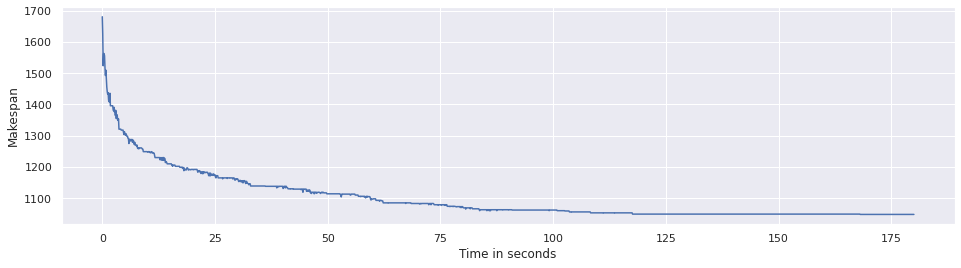

In [ ]:
graph_as_cc206_session6(*simplify_time_line(xy_genetic_makespans, dds=1))

Best solution found by running 3 minutes of random sampling represented as a Gantt Diagram

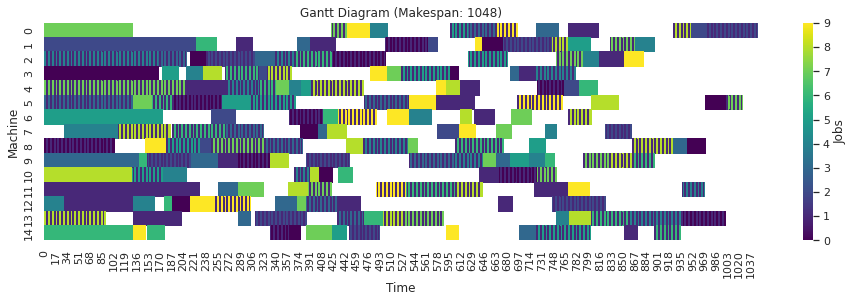

In [ ]:
_best_genetic_representation.__gantt_sns__()

* (3 points) present your conclusions of the results obtained.

### Conclusions:

After running the Genetics algorithm with different parameters, it's concluded that Genetics is way better than Random Sampling solutions. This is caused due to the fact that there's no consistency in the Random Sampling implementation as seen in the graph in Part 1. But something to highlight is the fact there has to be good parameters for Genetics to work, as very little population or almost null mutation will cause stagnation in the progress of the function.